Goals:
- What makes a globular cluster accreted?
- What do globular clusters tell us about the formation of the Milky Way?
- How do we know if they are formed within the Milky Way?
- What other possible formation scenarios could their be and how do we identify them?

Current Goal:
- Defining which globular clusters from our data sets are accreted

Notes:
- Have access to Fe/H value and estimated age of some galaxy candidates
- We can hopefully plot these values against each other and use "In-situ vs. accretted Milky Way..." paper to compare results with and determine which ones are accretted

In [9]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as plt
import matplotlib.pyplot as plt2

In [10]:
pd.read_csv('HarrisPartI.csv')

,ID,Name,RA,DEC,L,B,R_Sun,R_gc,X,Y,Z
0,NGC 104,47 Tuc,00:24:05.67,-72:04:52.6,305.89,-44.89,4.5,7.4,1.9,-2.6,-3.1
1,NGC 288,NaN,00:52:45.24,-26:34:57.4,152.30,-89.38,8.9,12.0,-0.1,0.0,-8.9
2,NGC 362,NaN,01:03:14.26,-70:50:55.6,301.53,-46.25,8.6,9.4,3.1,-5.1,-6.2
3,Whiting 1,NaN,02:02:57,-03:15:10,161.22,-60.76,30.1,34.5,-13.9,4.7,-26.3
4,NGC 1261,NaN,03:12:16.21,-55:12:58.4,270.54,-52.12,16.3,18.1,0.1,-10.0,-12.9
...,...,...,...,...,...,...,...,...,...,...,...
152,NGC 7089,M 2,21:33:27.02,-00:49:23.7,53.37,-35.77,11.5,10.4,5.6,7.5,-6.7
153,NGC 7099,M 30,21:40:22.12,-23:10:47.5,27.18,-46.84,8.1,7.1,4.9,2.5,-5.9
154,Pal 12,NaN,21:46:38.84,-21:15:09.4,30.51,-47.68,19.0,15.8,11.0,6.5,-14.1
155,Pal 13,NaN,23:06:44.44,+12:46:19.2,87.10,-42.70,26.0,26.9,1.0,19.1,-17.6


In [11]:
pd.read_csv('HarrisPartIII.csv')

,ID,v_r,v_r_e,v_LSR,sig_v,sig_v_e,c,r_c,r_h,mu_V,rho_0,lg_tc,lg_th
0,NGC 104,-18.0,0.1,-26.7,11.0,0.3,2.07,0.36,3.17,14.38,4.88,7.84,9.55
1,NGC 288,-45.4,0.2,-51.9,2.9,0.3,0.99,1.35,2.23,20.05,1.78,8.99,9.32
2,NGC 362,223.5,0.5,214.0,6.4,0.3,1.76,0.18,0.82,14.80,4.74,7.76,8.93
3,Whiting 1,-130.6,1.8,-138.1,NaN,NaN,0.55,0.25,0.22,NaN,NaN,NaN,7.93
4,NGC 1261,68.2,4.6,54.9,NaN,NaN,1.16,0.35,0.68,17.73,2.99,8.59,9.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NGC 7089,-5.3,2.0,3.8,8.2,0.6,1.59,0.32,1.06,15.78,4.00,8.48,9.40
153,NGC 7099,-184.2,0.2,-179.6,5.5,0.4,2.50,0.06,1.03,15.35,5.01,6.37,8.88
154,Pal 12,27.8,1.5,32.5,NaN,NaN,2.98,0.02,1.72,19.21,3.64,5.22,9.28
155,Pal 13,25.2,0.3,30.9,0.9,0.3,0.66,0.48,0.36,24.31,0.16,8.36,8.35


In [12]:
Krause = pd.read_csv('Krause21.csv', usecols=['Age', 'FeH']) #usecols specifies specific columns
print(Krause)

      Age   FeH
0   12.80 -0.76
1   12.20 -1.32
2   10.00 -1.26
3   10.24 -1.08
4    7.64 -1.13
..    ...   ...
56  11.80 -1.31
57  14.60 -2.33
58  12.00 -1.50
59   7.40 -0.12
60   8.60 -0.81

[61 rows x 2 columns]


In [13]:
vandenBerg = pd.read_csv('vandenBerg_table2.csv', usecols=['Age', 'FeH']) #usecols specifies specific columns
print(vandenBerg)

     FeH    Age
0  -0.76  11.75
1  -1.32  11.50
2  -1.30  10.75
3  -1.27  10.75
4  -1.18  11.00
5  -1.18  11.00
6  -1.51  11.50
7  -1.78  12.25
8  -2.27  12.00
9  -1.89  12.50
10 -2.06  12.25
11 -2.30  12.25
12 -1.50  11.75
13 -1.70  12.50
14 -2.31  12.50
15 -1.33  11.50
16 -0.29  10.75
17 -1.63  12.25
18 -1.98  12.25
19 -1.18  11.50
20 -1.82  12.75
21 -1.03  12.00
22 -1.58  12.00
23 -1.33  13.00
24 -1.57  11.75
25 -0.37  11.25
26 -2.35  12.75
27 -0.62  10.75
28 -1.07  12.50
29 -0.59  11.00
30 -1.99  13.00
31 -0.46  10.75
32 -1.79  12.75
33 -1.82  12.50
34 -1.50  11.75
35 -0.42  11.25
36 -0.59  11.00
37 -0.76  11.25
38 -1.70  12.50
39 -1.62  12.75
40 -1.44  11.75
41 -1.26  12.50
42 -1.10  12.50
43 -1.55  12.50
44 -2.00  12.75
45 -1.93  13.00
46 -0.82  11.00
47 -1.56  11.75
48 -1.48  11.50
49 -2.33  12.75
50 -1.66  11.75
51 -2.33  13.00
52 -1.74  12.00
53 -0.81   9.00
54 -2.34  13.00


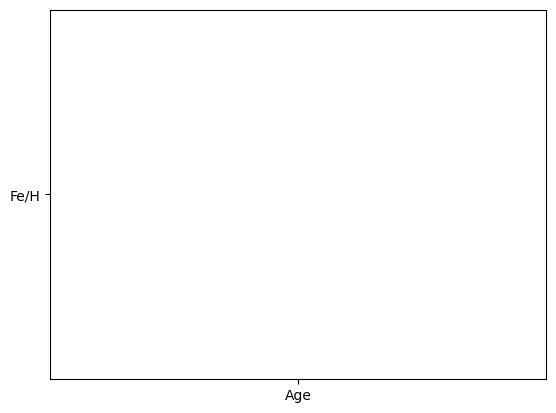

In [14]:
#Attempting plot of Krause data
x = np.array(['Age'])
y = np.array(['Fe/H'])

plt2.plot(x,y)
plt2.show()

<Axes: xlabel='Age', ylabel='FeH'>

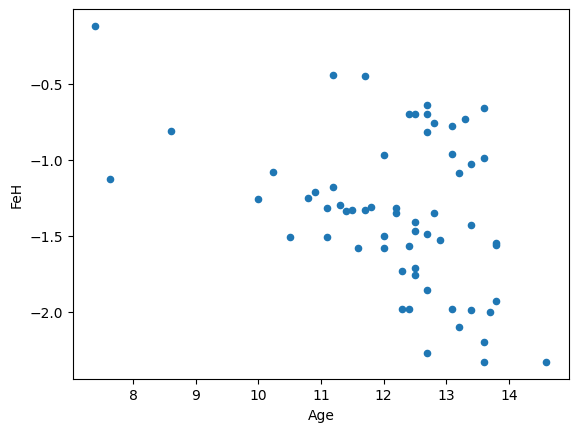

In [18]:
Krause.plot.scatter(x="Age", y="FeH")

